In [2]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

'wget' is not recognized as an internal or external command,
operable program or batch file.


,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
df = dataset.copy()

df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

df['sex'] = df['sex'].map({'male': 1, 'female': 0})

df = pd.get_dummies(df, columns=['region'], prefix='', prefix_sep='')

region_cols = ['northeast', 'northwest', 'southeast', 'southwest']
df[region_cols] = df[region_cols].astype(int)

df.tail()


,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
1333,50,1,31.0,3,0,10600.55,0,1,0,0
1334,18,0,31.9,0,0,2205.98,1,0,0,0
1335,18,0,36.9,0,0,1629.83,0,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,0,1
1337,61,0,29.1,0,1,29141.36,0,1,0,0


In [5]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('expenses')
test_labels = test_features.pop('expenses')

In [6]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

In [7]:
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(units=1)
])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss=['mae'], metrics=['mae', 'mse']
)
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [8]:
model.evaluate(test_dataset, test_labels, verbose=2)

9/9 - 0s - 2ms/step - loss: 92.7102 - mae: 92.7102 - mse: 21134.6875


[92.71021270751953, 92.71021270751953, 21134.6875]

9/9 - 0s - 2ms/step - loss: 92.7102 - mae: 92.7102 - mse: 21134.6875
Testing set Mean Abs Error: 92.71 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


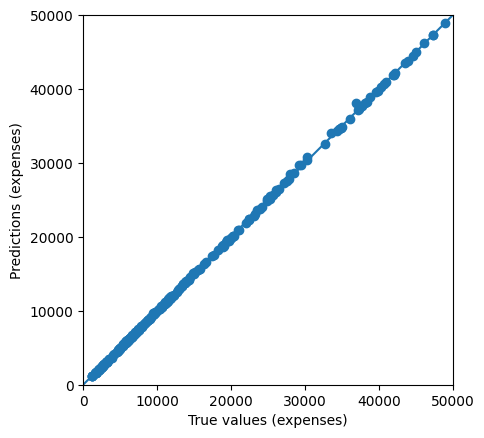

In [9]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
